In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
data_dir = "TrafficSign\Train"
batch_size = 32
img_height = 180
img_width = 180

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\PC\AppData\Local\Temp\ipykernel_8628\3780488996.py:1: SyntaxWarning: invalid escape sequence '\T'
  data_dir = "TrafficSign\Train"


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [5]:
# train_ds

In [6]:
# c = 981 (31368/32)
for i,j in train_ds:
    print(i.shape,'\n\n',j)
    break

(32, 180, 180, 3) 

 tf.Tensor(
[ 5 17  9  5  3 18 15 23 32 39 42  5 36 28 23  1 18 12 40 38  4 32 23 42
 40  6  1 38 41 21 40  2], shape=(32,), dtype=int32)


In [7]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


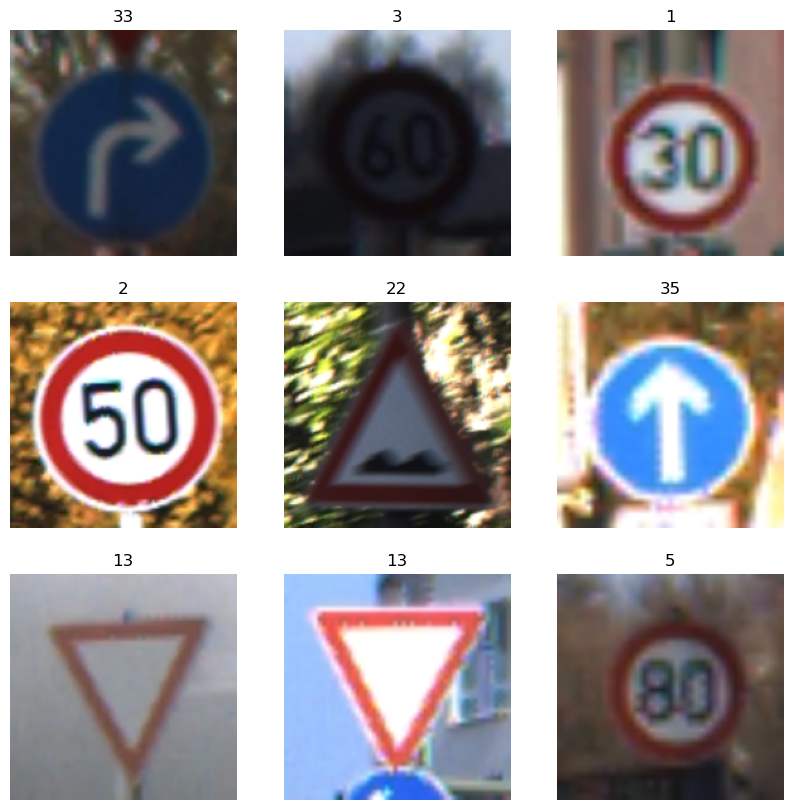

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
# tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [10]:
for i,j in train_ds:
    print(i.shape,j)
    print()
    print(i[0][0])
    break

(32, 180, 180, 3) tf.Tensor(
[ 2  4  0 29  9 38 42  6 10  5 18 11 13  1 17  5 32 34  6 34  1 34 32  5
 38 32 12 29 38 18 16  4], shape=(32,), dtype=int32)

tf.Tensor(
[[15.        16.        21.       ]
 [15.        16.        21.       ]
 [15.        16.        21.       ]
 [15.        16.        21.       ]
 [15.        16.        21.       ]
 [15.        16.        21.       ]
 [15.        16.        21.       ]
 [15.        16.        21.       ]
 [15.        16.        21.       ]
 [14.863889  16.        21.       ]
 [14.691667  16.        21.       ]
 [14.519444  16.        21.       ]
 [14.347222  16.        21.       ]
 [14.175     16.        21.       ]
 [14.002778  16.        21.       ]
 [14.169445  16.        21.       ]
 [14.341667  16.        21.       ]
 [14.513889  16.        21.       ]
 [14.686111  16.        21.       ]
 [14.858334  16.        21.       ]
 [14.969444  15.969444  20.969444 ]
 [14.797222  15.797222  20.797222 ]
 [14.625     15.625     20.625    ]
 [14.

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

In [12]:
for i,j in normalized_ds:
    print(i.shape,j)
    print()
    print(i[0][0])
    break

(32, 180, 180, 3) tf.Tensor(
[40 23 18 12  3 27  2  2 12  1 39  5  2 12 32  4  5 42  8 41 32  4 12 37
  3  4 27  5 42 34  4 35], shape=(32,), dtype=int32)

tf.Tensor(
[[0.10196079 0.10980393 0.10980393]
 [0.10196079 0.10980393 0.10980393]
 [0.10196079 0.10980393 0.10980393]
 [0.1030719  0.10924837 0.10869282]
 [0.10450981 0.10852942 0.10725491]
 [0.10594772 0.10781047 0.105817  ]
 [0.10738563 0.10709151 0.1043791 ]
 [0.10882354 0.10637256 0.10294119]
 [0.11117648 0.10633988 0.10264706]
 [0.11549021 0.10777778 0.10480393]
 [0.11980394 0.10921569 0.10696079]
 [0.12411765 0.1106536  0.10911766]
 [0.12843138 0.11209151 0.11127452]
 [0.13274512 0.11352942 0.11343139]
 [0.13581699 0.11869282 0.11869282]
 [0.13869283 0.12444445 0.12444445]
 [0.14156863 0.1301961  0.1301961 ]
 [0.14444447 0.13594772 0.13594772]
 [0.14732027 0.14169934 0.14169934]
 [0.14637256 0.14333335 0.14392158]
 [0.13990197 0.13901962 0.14104576]
 [0.13343138 0.13470589 0.13816994]
 [0.1269608  0.13039216 0.13529412]
 [0.1

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
normalized_ds = normalized_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [14]:
for i,j in train_ds:
    print(i.shape,j)
    print()
    print(i[0][0])
    break

(32, 180, 180, 3) tf.Tensor(
[11 28 30 38 12 23 11 30 11  3  2  3 38 12 12 42 10  2 34 38 29 40 12 18
 42  7 38 32  6 36 12 23], shape=(32,), dtype=int32)

tf.Tensor(
[[ 52.        52.        45.      ]
 [ 52.        52.        45.      ]
 [ 52.083332  52.166668  45.333332]
 [ 52.516666  53.033333  47.066666]
 [ 52.95      53.9       48.8     ]
 [ 53.383335  54.766666  50.533333]
 [ 53.816666  55.63333   52.266666]
 [ 54.875     57.25      55.      ]
 [ 56.391666  59.416668  58.466667]
 [ 57.908333  61.583336  61.933334]
 [ 59.425     63.75      65.4     ]
 [ 60.941666  65.91667   68.86667 ]
 [ 62.875     66.        70.25    ]
 [ 64.825     66.        71.55    ]
 [ 66.775     66.        72.85    ]
 [ 68.725     66.        74.15    ]
 [ 71.425     66.75      75.3     ]
 [ 75.54167   68.916664  76.166664]
 [ 79.65833   71.08333   77.03333 ]
 [ 83.774994  73.25      77.9     ]
 [ 87.89166   75.416664  78.76666 ]
 [ 85.833336  73.308334  75.675   ]
 [ 81.5       69.625     71.125   ]
 [ 77

In [15]:
for i,j in normalized_ds:
    print(i.shape,j)
    print()
    print(i[0][0])
    break

(32, 180, 180, 3) tf.Tensor(
[18 10 42 27 12  2 25 18 34 29 34  5  5 13 13 40  1 38 18 25 32  3 41 22
 32  3  5 42 18 35 29  6], shape=(32,), dtype=int32)

tf.Tensor(
[[0.45882356 0.4039216  0.34901962]
 [0.464902   0.39784315 0.33990198]
 [0.47647062 0.39362746 0.33480394]
 [0.4786275  0.39029413 0.3314706 ]
 [0.47068632 0.38568628 0.32686275]
 [0.46549022 0.3817647  0.32225493]
 [0.47813728 0.38764706 0.32490197]
 [0.4681373  0.36764708 0.304902  ]
 [0.4666667  0.37039217 0.30764708]
 [0.4576471  0.36803922 0.30529413]
 [0.44931373 0.36303923 0.29862747]
 [0.44813728 0.36186278 0.29627454]
 [0.4529412  0.3651961  0.30245098]
 [0.46627453 0.36852944 0.3057843 ]
 [0.48607847 0.3783334  0.30911765]
 [0.484902   0.372451   0.2992157 ]
 [0.49264708 0.37480396 0.30029416]
 [0.5063726  0.38480395 0.31029412]
 [0.5146079  0.39303923 0.31852943]
 [0.51705885 0.3966667  0.32215688]
 [0.5103922  0.4033334  0.32882357]
 [0.5037255  0.40696082 0.32941177]
 [0.50931376 0.41029415 0.32941177]
 [0.5

In [16]:
num_classes = 43

model = Sequential([
  layers.Rescaling(1./255),
    # (32, 180, 180, 3)
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # (32, 180, 180, 16)
  layers.MaxPooling2D(),
    # (32, 90, 90, 16)
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # (32, 90, 90, 32)
  layers.MaxPooling2D(),
    # (32, 45, 45, 32)
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

# model = tf.keras.Sequential([
#   # tf.keras.layers.Rescaling(1./255),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputs (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
epochs = 5
MyHistory = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 297s 298ms/step - accuracy: 0.5057 - loss: 1.8337 - val_accuracy: 0.8894 - val_loss: 0.3675
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 299s 304ms/step - accuracy: 0.9403 - loss: 0.2008 - val_accuracy: 0.9560 - val_loss: 0.1751
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 248s 252ms/step - accuracy: 0.9673 - loss: 0.1129 - val_accuracy: 0.9640 - val_loss: 0.1517
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 251s 256ms/step - accuracy: 0.9780 - loss: 0.0733 - val_accuracy: 0.9705 - val_loss: 0.1359
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 239s 244ms/step - accuracy: 0.9818 - loss: 0.0598 - val_accuracy: 0.9788 - val_loss: 0.1206


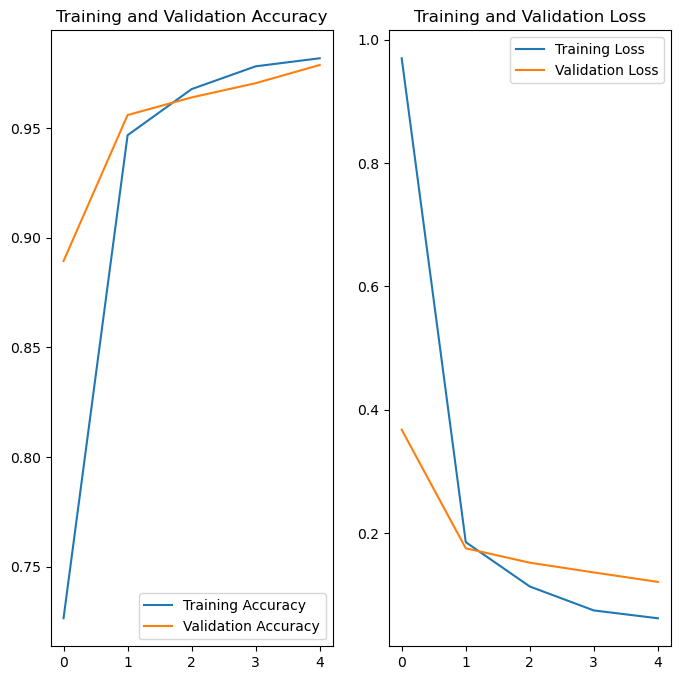

In [20]:
acc = MyHistory.history['accuracy']
val_acc = MyHistory.history['val_accuracy']

loss = MyHistory.history['loss']
val_loss = MyHistory.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_5, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [30]:
MyHistory

In [39]:
c=0
for i ,j in normalized_ds:
    # print(i.shape)
    c+=1
    # break

In [46]:
for i ,j in train_ds:
    print(i.shape,j)
    break

(32, 180, 180, 3) tf.Tensor(
[40 42 23  1  2 37  9  1  4  5 29 12 38 30  0 28  1 41 27 25 15 11 34 17
  9 23 21 14 12  5 32 40], shape=(32,), dtype=int32)


In [47]:
train_ds

TypeError: '_PrefetchDataset' object is not subscriptable